In [74]:
#Multiple Linear Regression to predict the profit of startups based on various independent variables, such as R&D Spend, Administration, Marketing Spend, and State.
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
# Importing the dataset
dataset = pd.read_csv(r"C:\Users\user\50_Startups.csv")
D = dataset.iloc[:, :].values
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [76]:
print(D)  
# R&D Spend,	Administration, 	Marketing Spend, 	State,	Profit

[[165349.2 136897.8 471784.1 'New York' 192261.83]
 [162597.7 151377.59 443898.53 'California' 191792.06]
 [153441.51 101145.55 407934.54 'Florida' 191050.39]
 [144372.41 118671.85 383199.62 'New York' 182901.99]
 [142107.34 91391.77 366168.42 'Florida' 166187.94]
 [131876.9 99814.71 362861.36 'New York' 156991.12]
 [134615.46 147198.87 127716.82 'California' 156122.51]
 [130298.13 145530.06 323876.68 'Florida' 155752.6]
 [120542.52 148718.95 311613.29 'New York' 152211.77]
 [123334.88 108679.17 304981.62 'California' 149759.96]
 [101913.08 110594.11 229160.95 'Florida' 146121.95]
 [100671.96 91790.61 249744.55 'California' 144259.4]
 [93863.75 127320.38 249839.44 'Florida' 141585.52]
 [91992.39 135495.07 252664.93 'California' 134307.35]
 [119943.24 156547.42 256512.92 'Florida' 132602.65]
 [114523.61 122616.84 261776.23 'New York' 129917.04]
 [78013.11 121597.55 264346.06 'California' 126992.93]
 [94657.16 145077.58 282574.31 'New York' 125370.37]
 [91749.16 114175.79 294919.57 'Flor

In [77]:
print(X)
# R&D Spend,	Administration, 	Marketing Spend, 	State

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [78]:
print(y)
# Profit

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


In [79]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
# The State column (column index 3) is a categorical variable, which needs to be converted into numeric format.
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder transforms categorical data into a set of binary columns (one column for each unique value).
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
# The result of ct.fit_transform(X) is returned as a sparse matrix, np.array(...) converts this result into a standard NumPy array for uniform handling in further computations.
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

In [80]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# X_train: Represents the features (independent variables) used as input to the model for training.eg- R&D Spend,	Administration, 	Marketing Spend, 	State
# y_train: Represents the target (dependent variable) the model aims to predict based on X_train.eg- profit

In [61]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
 # create a regression model.
regressor.fit(X_train, y_train)
# The model learns the relationship between the features (X_train) and the target variable (y_train).

LinearRegression()

In [82]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
# y_pred contains the predicted profits for the test set (X_test).
np.set_printoptions(precision=2)
# limits the precision of printed values to 2 decimal places.
print("Predicted vs Actual:")
for pred, actual in zip(y_pred, y_test):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

# zip(y_pred, y_test):
# Combines y_pred and y_test into pairs (tuples) of corresponding predicted and actual values.
# Example: If y_pred = [100, 200, 300] and y_test = [110, 210, 310], then:
# zip(y_pred, y_test) --> [(100, 110), (200, 210), (300, 310)]

# for pred, actual in zip(...):
# Iterates over the paired tuples from zip.
# In each iteration:
# pred holds a predicted value.
# actual holds the corresponding actual value.

# f": Indicates an formatted string literal, which allows embedding expressions inside curly braces {}.

# {actual:.2f}:
# Similarly embeds the value of actual with 2 decimal places.


Predicted vs Actual:
Predicted: 103015.20, Actual: 103282.38
Predicted: 132582.28, Actual: 144259.40
Predicted: 132447.74, Actual: 146121.95
Predicted: 71976.10, Actual: 77798.83
Predicted: 178537.48, Actual: 191050.39
Predicted: 116161.24, Actual: 105008.31
Predicted: 67851.69, Actual: 81229.06
Predicted: 98791.73, Actual: 97483.56
Predicted: 113969.44, Actual: 110352.25
Predicted: 167921.07, Actual: 166187.94


In [37]:
y_profit = regressor.predict([[0,0,1,90000,100000,140000]])
y_profit

array([121279.45])

In [38]:
y_profit = regressor.predict([[1,0,0,90000,100000,140000]])
y_profit

array([120580.08])

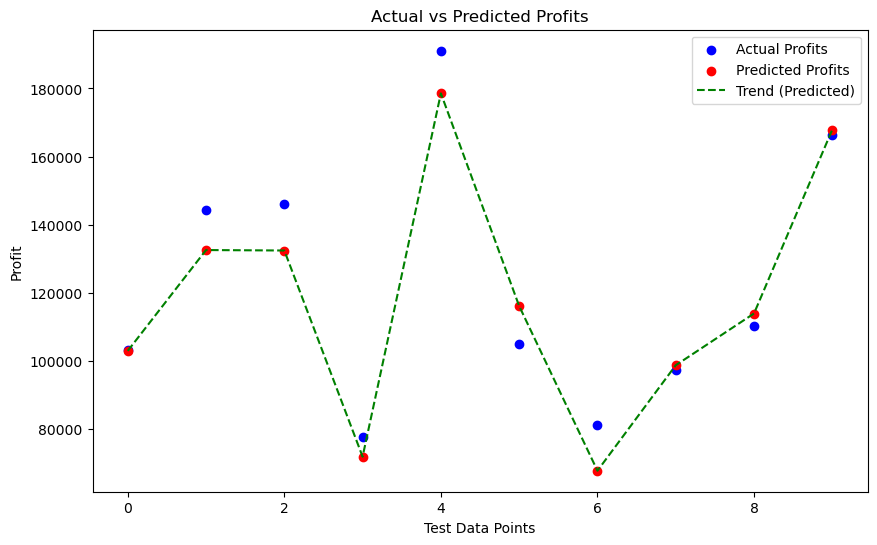

In [83]:
# Visualizing the Actual vs Predicted profits
plt.figure(figsize=(10, 6))
# figsize=(10, 6):
# Specifies the size of the figure (width = 10 units, height = 6 units).
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Profits')
# plt.scatter(): Creates a scatter plot with individual data points represented as dots.
# range(len(y_test)):
# Generates a sequence of indices (e.g., [0, 1, 2, ...]) corresponding to the data points in y_test.
# These indices are used for the x-axis.
# y_test:
# The actual profit values are plotted on the y-axis.
# color='blue':
# Sets the color of the data points to blue.
# label='Actual Profits':
# Provides a label for the legend to describe this data series as "Actual Profits."

plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Profits')
# The predicted profit values are plotted

plt.plot(range(len(y_pred)), y_pred, color='green', linestyle='dashed', label='Trend (Predicted)')
# plt.plot(): Creates a line plot to show the trend of predicted values.
# range(len(y_pred)):
# The x-axis values (indices of data points).
# y_pred:
# The predicted profit values (y-axis).
# color='green':
# The line is displayed in green.
# linestyle='dashed':
# The line style is dashed (---), distinguishing it from other elements in the plot.
# label='Trend (Predicted)':
# Label describing this series as "Trend (Predicted)."

plt.title('Actual vs Predicted Profits')
plt.xlabel('Test Data Points')
plt.ylabel('Profit')
plt.legend()
# Displays a legend on the plot, showing which color corresponds to "Actual Profits," "Predicted Profits," and "Trend (Predicted)."
plt.show()
